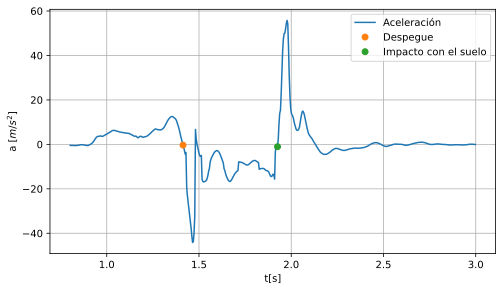

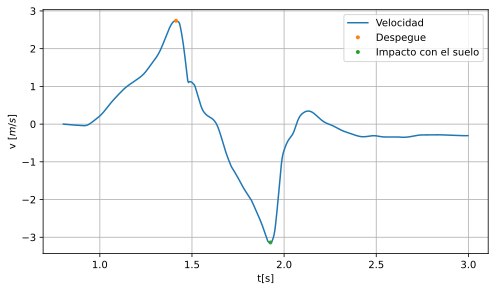

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  6 09:18:50 2021

@author: luisguan & mariamonti
"""

%config InlineBackend.figure_formats = ['svg']

import numpy as np #numpy (calculo, vectores)
import matplotlib.pyplot as plt #matplotlib (representacion grafica)
import pandas as pd #Pandas, para cargar datos de Excel 
from scipy import integrate #integracion numerica 
g=9.8
#para leer el archivo excel con las medidas del acelerometro
data = pd.read_excel('Salto_12_04.xlsx')  # Carga archivo excel
t = np.array(data['t'])  # Time samples
ax = np.array(data['ax'])  # ejemplo: a_x
ay = np.array(data['ay'])  # ejemplo: a_y
am = np.array(data['a'])  # ||a||

#para poner signo de ay y quitar g
a = am * np.sign(ay) - g

#para extraer datos en una ventana temporal
index = (t>=0.8)&(t<=3)  # indices entre t 0.8 y 3 s
t_sub = t[index]
a_sub = a[index]

#para hacer la integracion numerica de una serie temporal (a=f(t))
v = integrate.cumulative_trapezoid(a_sub, t_sub, initial=0) 

#para encontrar el indice con el valor maximo del array y

i_max = np.argmax(v)
i_min = np.argmin(v)

#para generar una figura y=f(x)
plt.figure('Aceleracion',figsize=(8,4.5))
plt.plot(t_sub, a_sub, label='Aceleración')
plt.plot(t_sub[i_max], a_sub[i_max], 'o',label='Despegue') #para mostrar solo un punto
plt.plot(t_sub[i_min], a_sub[i_min], 'o',label='Impacto con el suelo') #para mostrar solo un punto
plt.xlabel('t[s]')
plt.ylabel('a $[m/s^2]$')
plt.grid()
plt.legend()
plt.savefig('aceleracion.png', bbox_inches='tight')

plt.figure('Velocidad',figsize=(8,4.5))
plt.plot(t_sub, v, label='Velocidad')
plt.plot(t_sub[i_max], v[i_max],'.',label='Despegue') #para mostrar solo un punto
plt.plot(t_sub[i_min], v[i_min],'.',label='Impacto con el suelo')
plt.xlabel('t[s]')
plt.ylabel('v $[m/s]$')
plt.grid()
plt.legend()
plt.savefig('Velocidad.png', bbox_inches='tight')